In [2]:
%reset -f
from helpers import *
%matplotlib inline

# Introduction and Data preprocessing

We entered a colloration with AstraZeneca from June 2016 - December 2016. AstraZeneca conducts internal drug trials to investigate biological targets that are present in disease. The purpose is to search for compounds that modulate these biological targets. This process is known as High Content Screening (HCS).

From a particular High Content Screen conducted last year, the group within AstraZeneca measured the phenotype by taking microscopy images of the assays at intermediate points. They would like to investigate whether machine learning methods, which have broken records in performance computer vision and speech recognition, can identify drugs that would successfully pass later stages of the drug trial, specifically one which passed stage 3, using these intermediate microscopy images.

Stage 1 involved a a basic green fluorescence detection, Stage 2 and 3 involved counter screens, and stage 4 involved extensive laboratory tests. As shown below, approximately 1.7 million potential candidate drugs were included at the start of the trial, ~13000 passed Stage 1, ~3000 passed Stage 2, ~1000 passed Stage 3 and only 30 successfully passed Stage 4.

The task reduces to a binary classification problem, **positive drugs** are drug that pass Stage 3, and **negative drugs** negative drugs are those that do not pass to Stage 3.

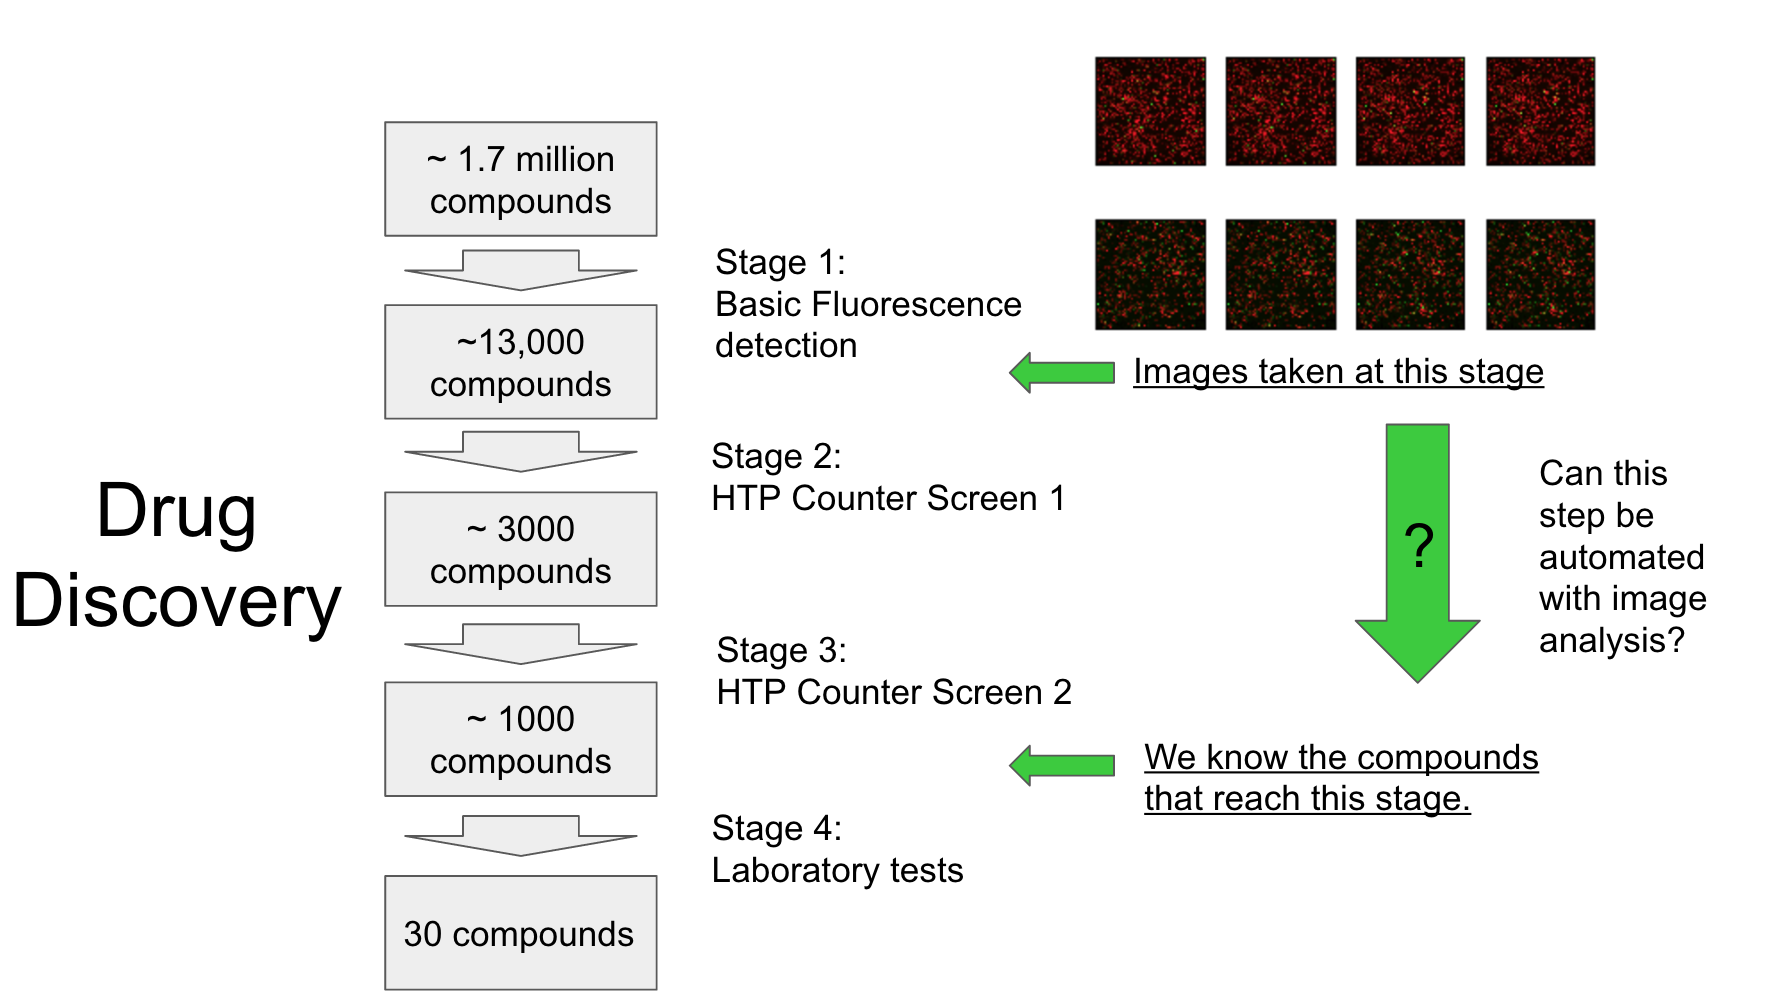

In [3]:
Image(filename='diagrams/DrugTrialflowchart.png') 

17161

In the high content screen, each drug was administered to the cells within a well. 4 images were taken of each well, one for each quadrant, and each image has a red and a green channel. The red channel identifies cell nuclei, and the green channel identifies the GFP tagged antigen. Each well contained a different drug, and so we give each drug an ID which refers to the the plate and well it was located in. In each plate there are many wells each with different well IDs, but across different plates there are wells with the same well ID. Therefore the combination of plate ID and well ID is required to give unique drug IDs. The drug IDs take the form of *plateID*_*wellID*, for example: 1053919905_A07.

We received the microsopy images of this drug trial that were taken after stage 1. We received these images in two batches, called Controls and IXData. The Control images we received on ? and the IXData we received on ?.

In the Control batch, we were given labels for which drug reached stage 3 successfully and which had not. We recieved images for <len(positive_control_IDs)> 96 positive drugs and <len(negative_control_IDs)> 96 negative drugs.

In the IXData batch, we received clean images for <len(IXimage_IDs)> 17161 drugs. We also received a list of <len(IXpositiveIDs)> 1228 positive IDs that successfully passed stage 3. Of this set, there existed images for <len(valid_positiveIDs)> 987. Therefore in total we have 987 positive drugs and 16174 negative drugs.



# Control Dataset

## Positive Controls

### Full Images

Displayed below are 3 example images from the positive controls.

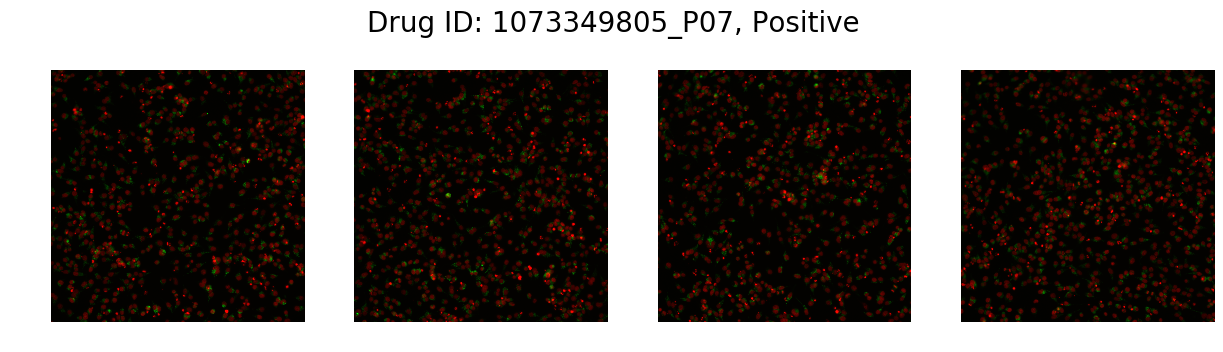

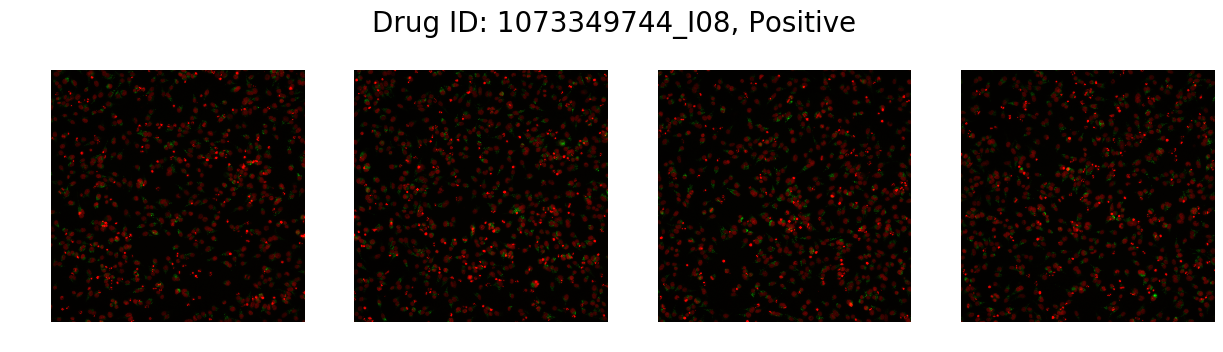

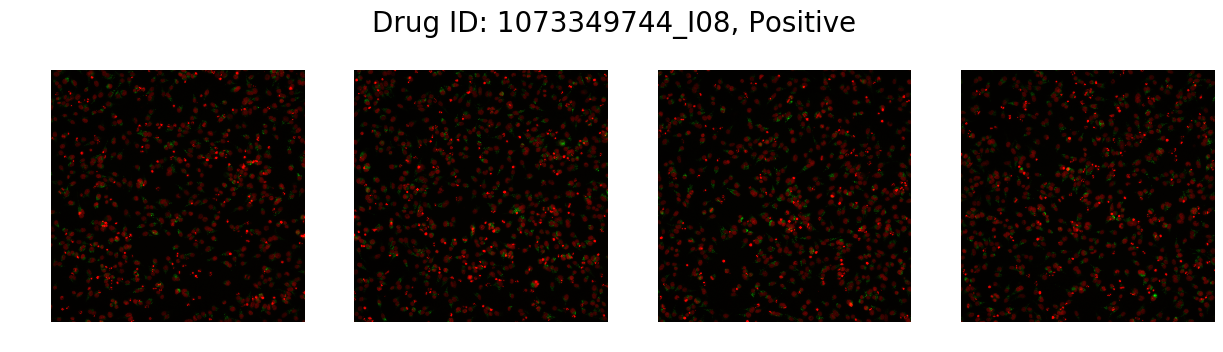

In [17]:
positive_random_choice = np.random.choice(positive_control_IDs,3)
for ID in positive_random_choice:
    a = Assay(ID, 'processed/CleanPositiveControls/')
    a.display()

### Zoomed

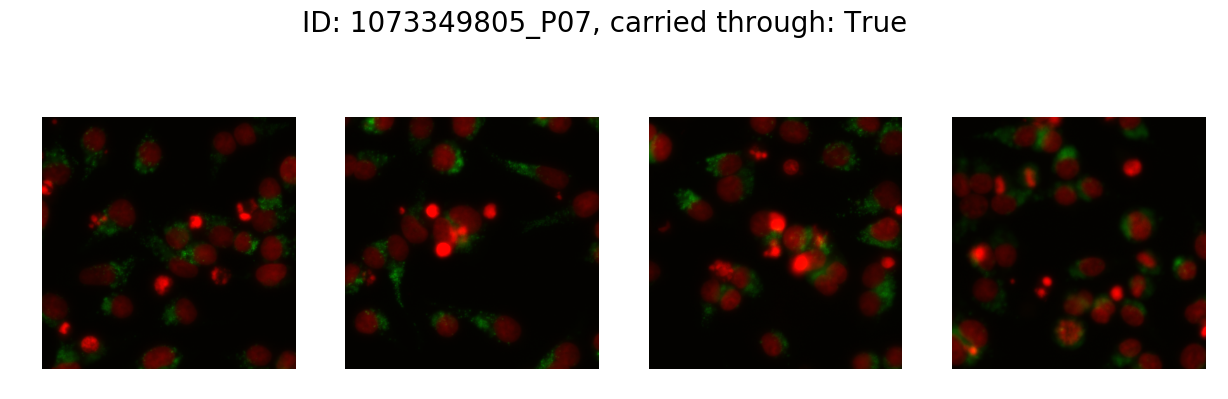

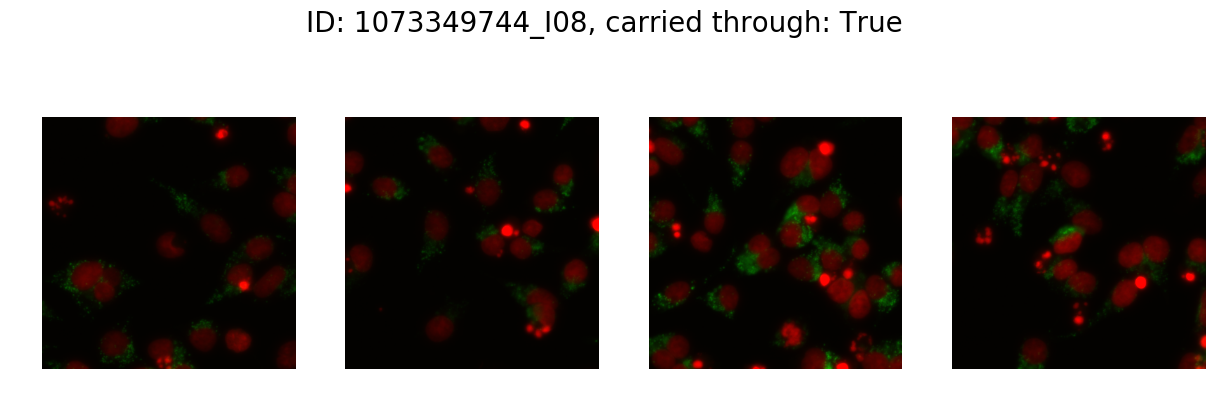

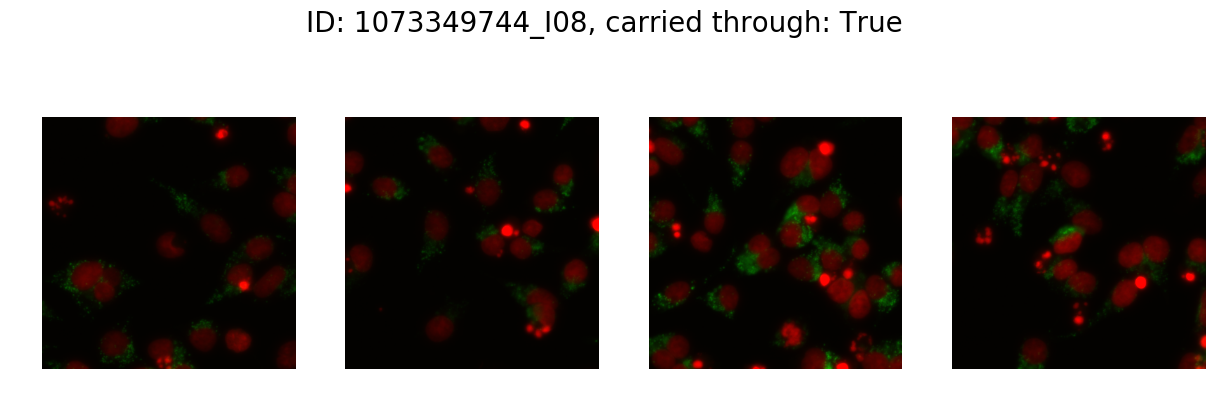

In [18]:
for ID in positive_random_choice:
    a = Assay(ID, 'processed/CleanPositiveControls/')
    a.display_sections(400)

## Negative Controls

### Full Images

Below displays 3 example full images from the negative controls. Below those, the images is zoomed to the central 400 pixels.

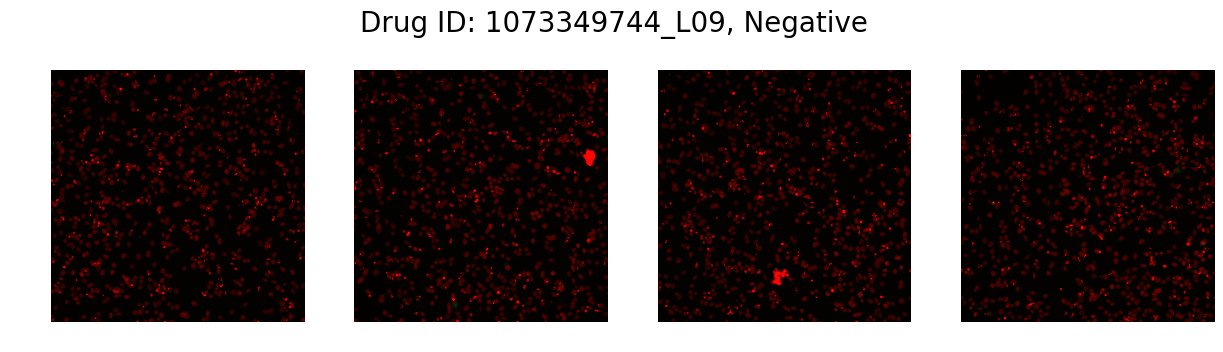

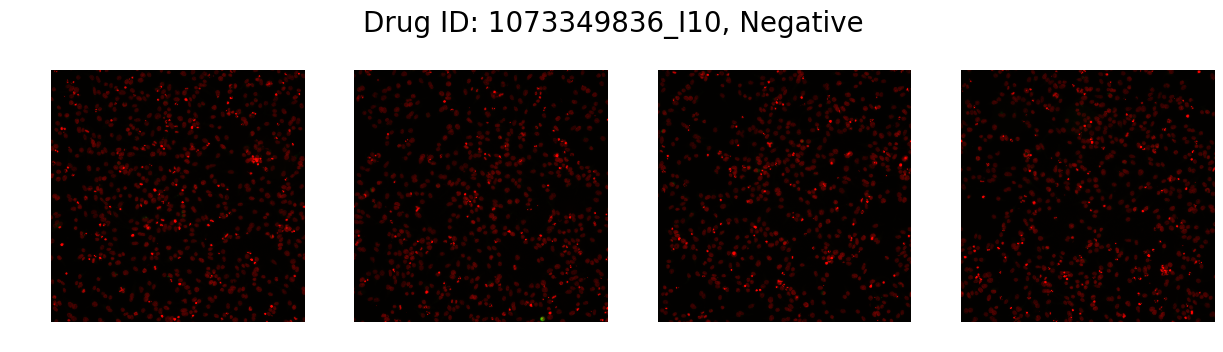

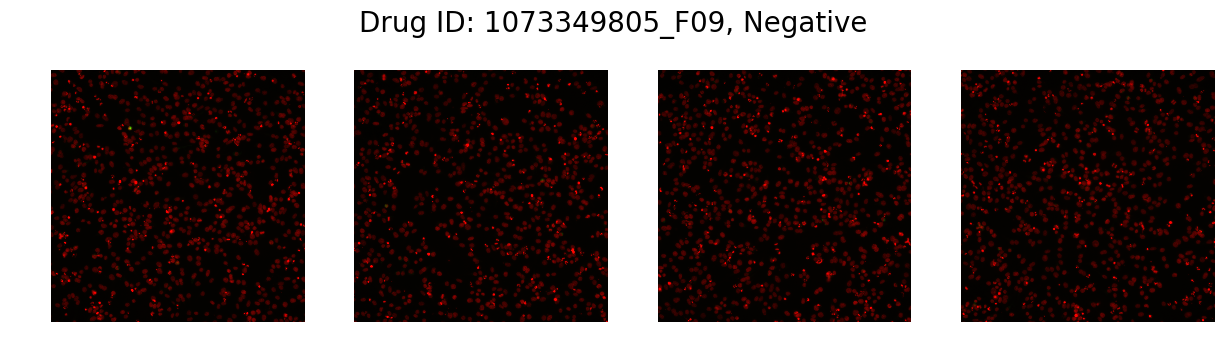

In [2]:
negative_random_choice = np.random.choice(negative_control_IDs,3)
for ID in np.random.choice(negative_control_IDs,3):
    a = Assay(ID, 'processed/CleanNegativeControls/')
    a.display()

### Zoomed

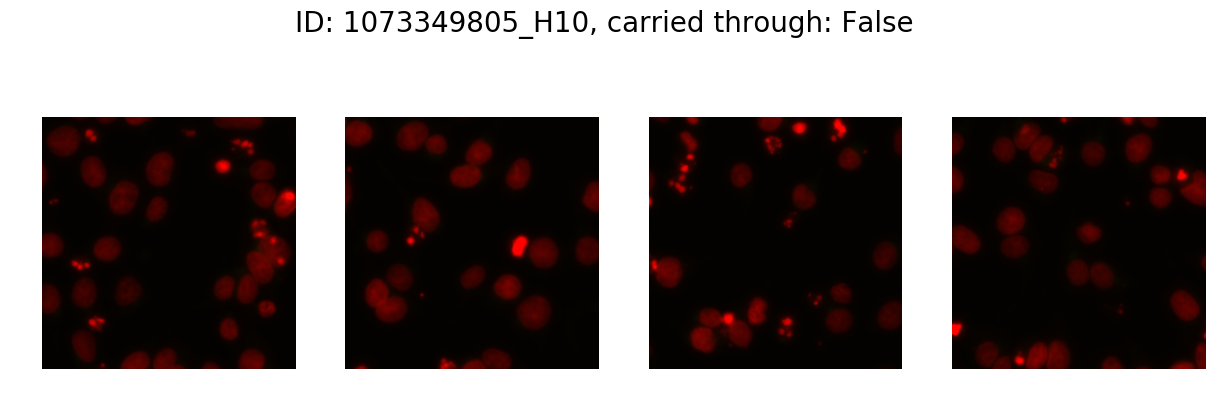

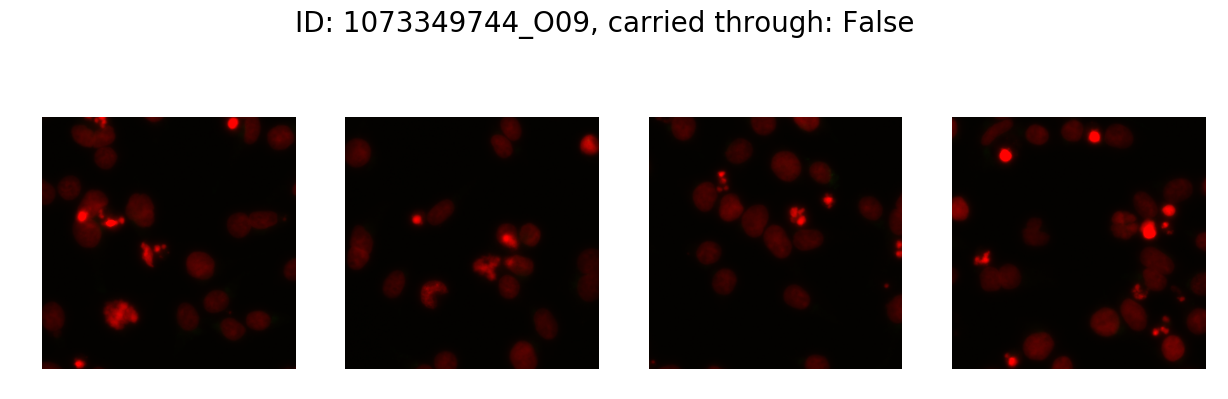

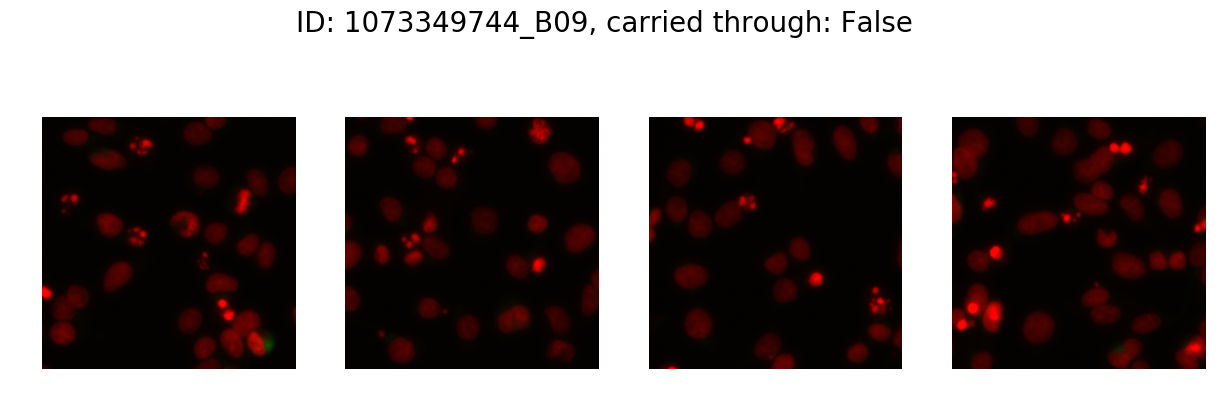

In [3]:
for ID in negative_random_choice:
    a = Assay(ID, 'processed/CleanNegativeControls/')
    a.display_sections(400)

# Mean pixel analysis on Control

Presence or absence of green seemed to be a strong indicator of probability of being carried through. To test this we plotted average pixel intensities across 4 replicates.

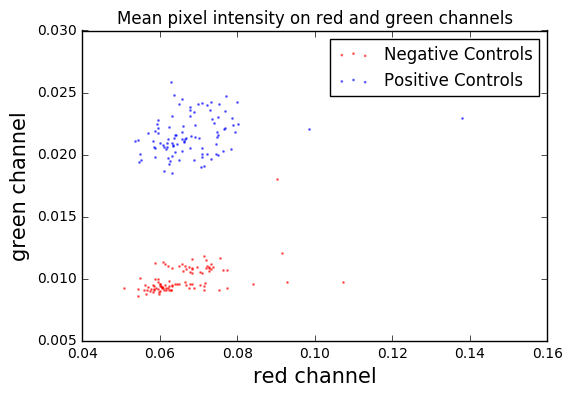

In [23]:
mean_pixel_dict_controls = generate_mean_pixel_intensities_for_controls()
display_pixel_cluster(mean_pixel_dict_controls, alpha=0.5)
# CLASSES ARE SEPERABLE

These are clearly seperable. The assays that are carried through tend to have a higher mean pixel intensity on the green channel.

# IXClean

Now we run the same analysis on the second, larger dataset. We investigate how seperable the classes are using pixel intensity. We display the full image, as well as zooming to the 400x400 central square.

## Positive examples 

### Full images

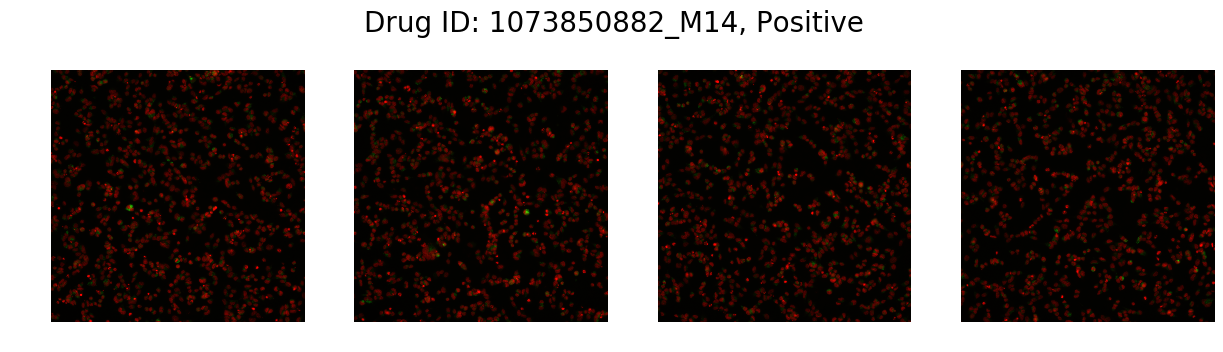

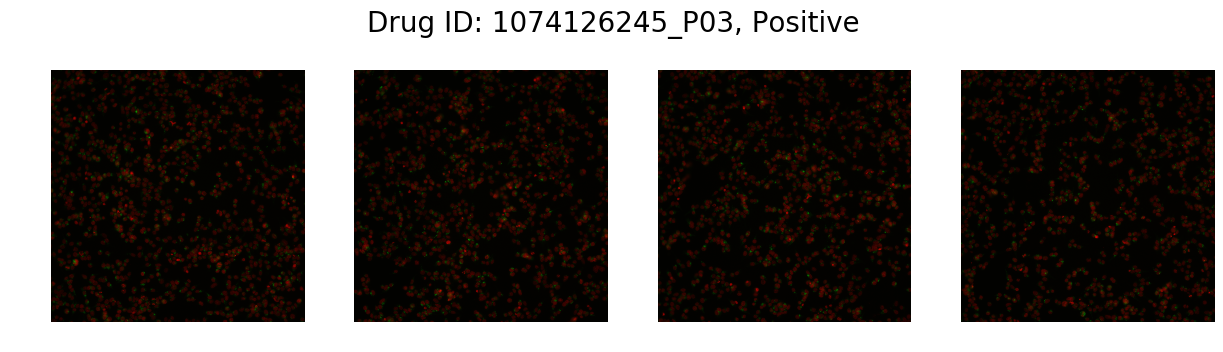

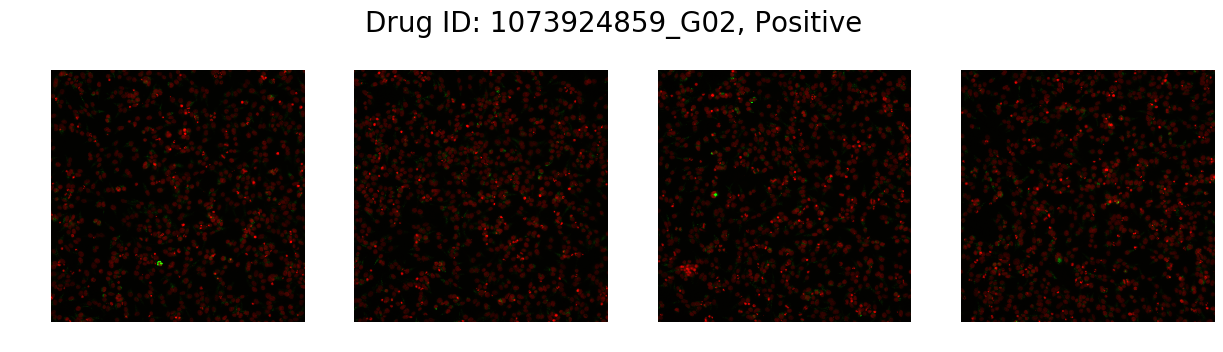

In [14]:
positive_random_choice = np.random.choice(valid_positiveIDs,3)
for ID in positive_random_choice:
    a = Assay(ID, 'processed/IXClean/')
    a.display()

### Zoomed

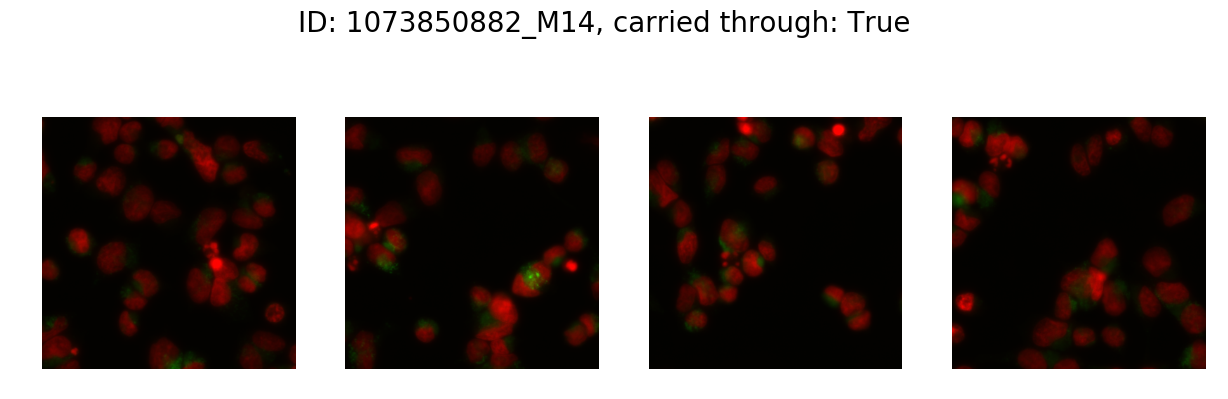

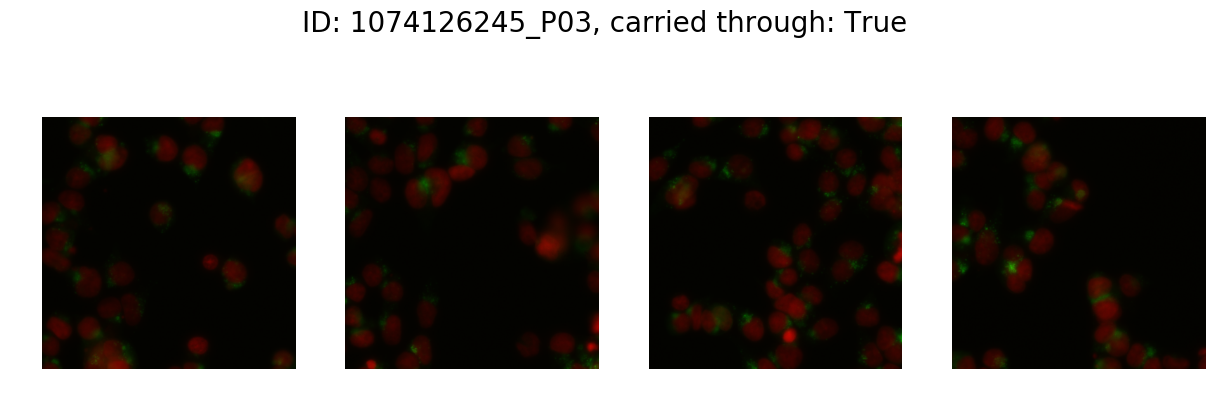

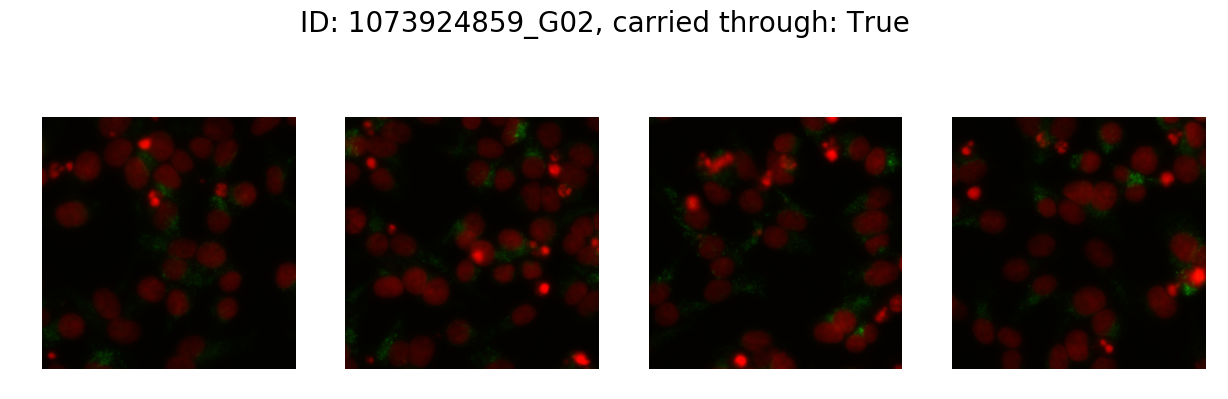

In [15]:
for ID in positive_random_choice:
    a = Assay(ID, 'processed/IXClean/')
    a.display_sections(400)

## Negative examples

### Full images

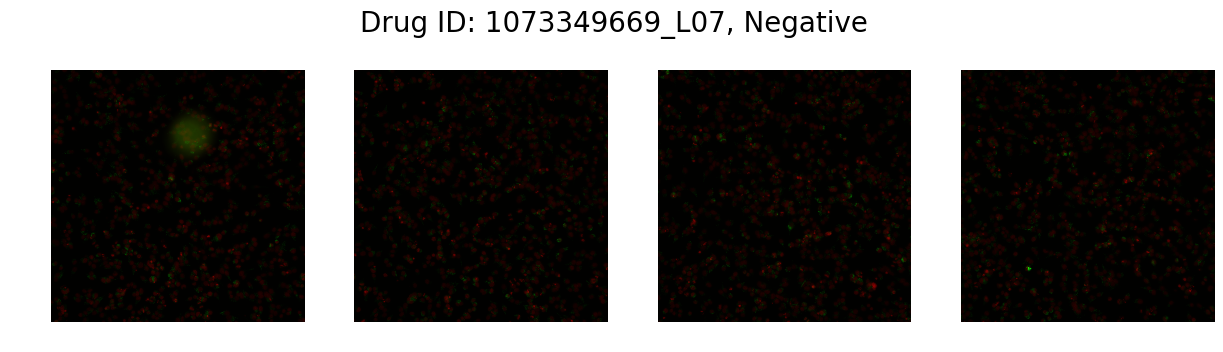

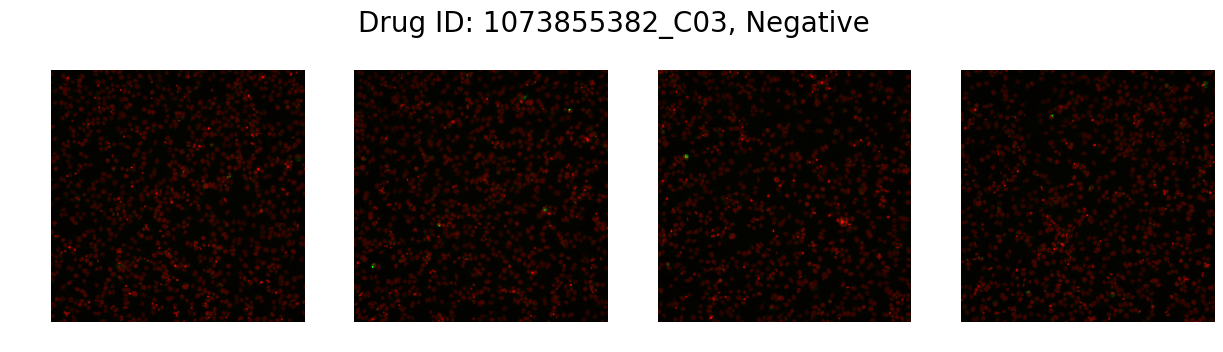

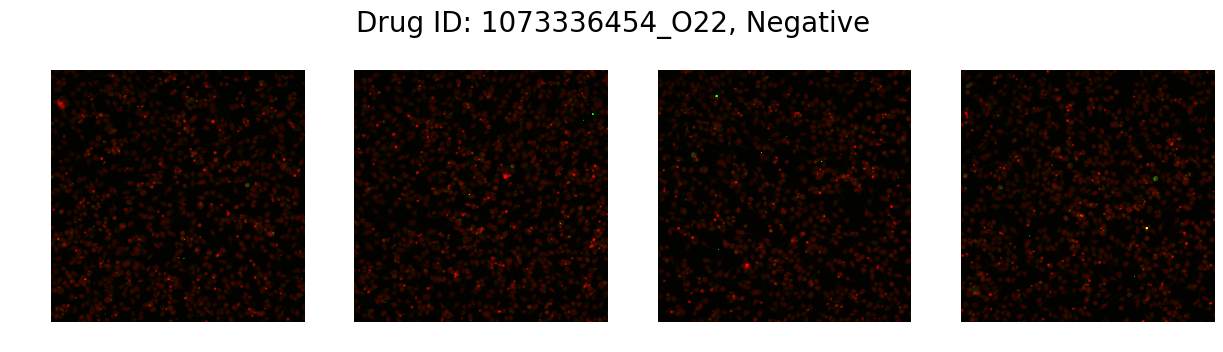

In [16]:
negative_random_choice = np.random.choice(IXnegativeIDs,3)
for ID in np.random.choice(IXnegativeIDs,3):
    a = Assay(ID, 'processed/IXClean/')
    a.display()

### Zoomed

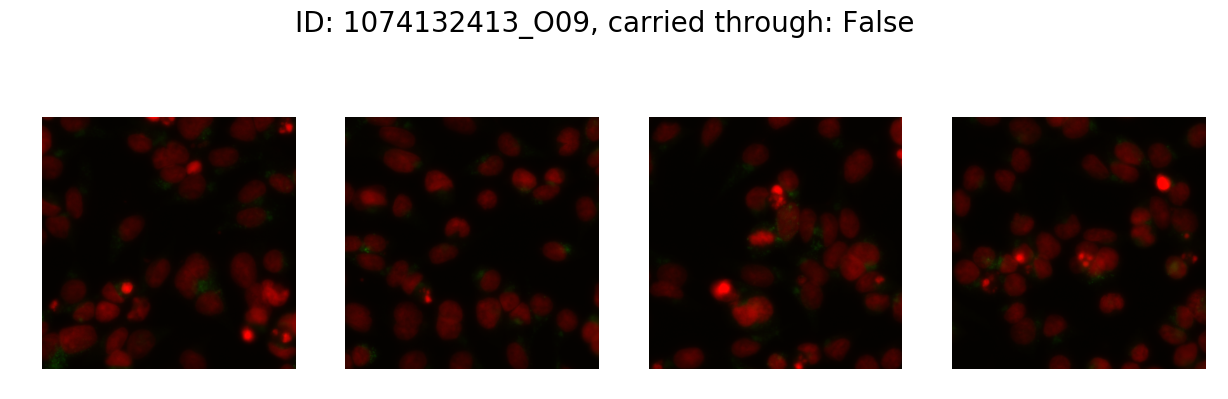

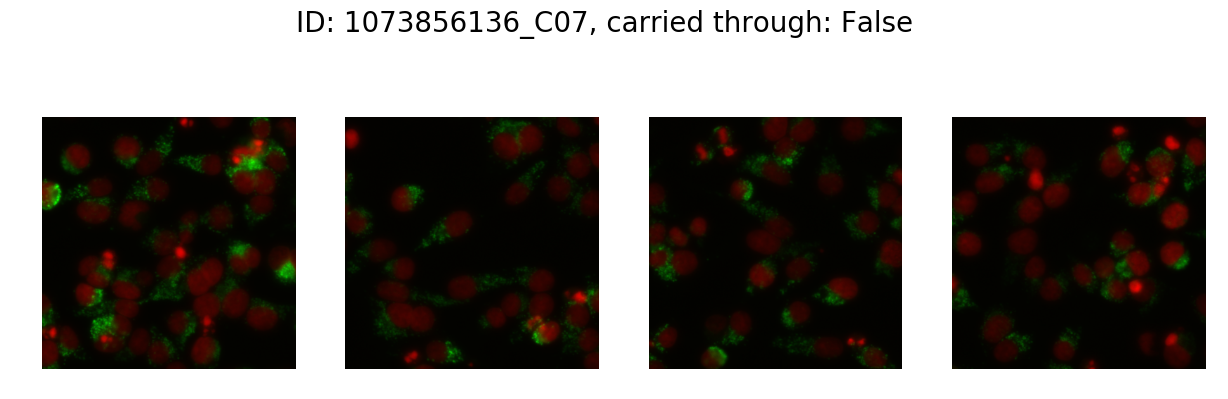

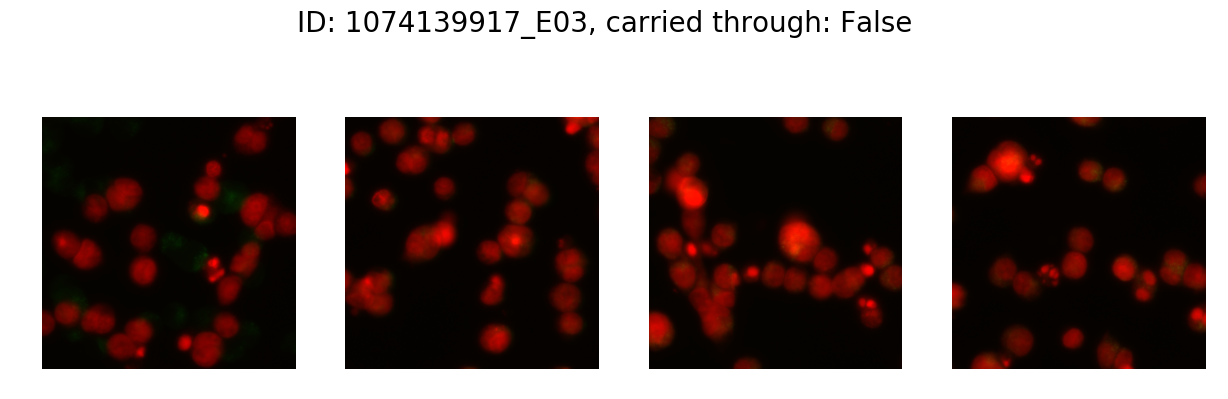

In [17]:
for ID in negative_random_choice:
    a = Assay(ID, 'processed/IXClean/')
    a.display_sections(400)

Just by observing these classes, it is evident that the two classes cannot anymore be differentiate by the mean pixel intensities on the green channel. There exist many images with high mean green pixel intensities. To confirm this intuition we re-ran the previous pixel intensity analysis.

# Mean pixel analysis on IXClean

Next we tried to see whether the same analysis was able to seperate the classes on the second, larger batch of data.

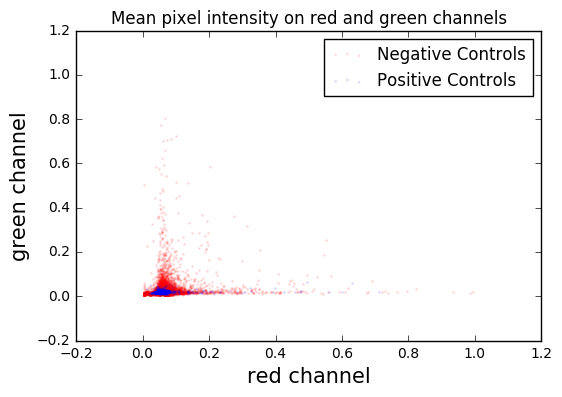

In [21]:
mean_pixel_dict_IXClean = generate_mean_pixel_intensities_for_IXClean()
display_pixel_cluster(mean_pixel_dict_IXClean, 0.1)
### CLASS NOT SEPERABLE

Clearly, in the second batch of data the classes are not seperable. The data seems inconsistent with the first batch. Much of the negative class drugs reach an extemely high average green pixel intensity, whereas in the previous batch, the mean pixel intensity of the negative batch was strictly less that the the positive batch. 

For convenience, the mean pixel intensities of the control are redisplayed.

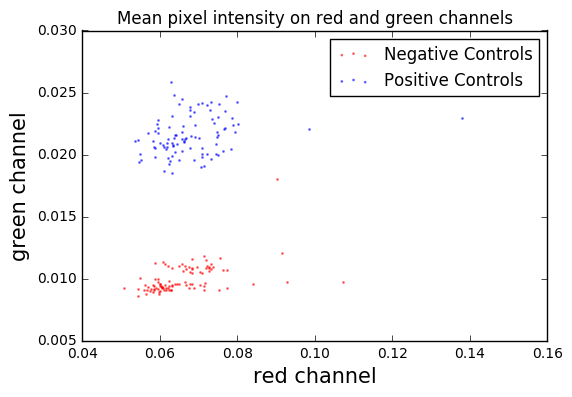

In [30]:
mean_pixel_dict_controls = generate_mean_pixel_intensities_for_controls()
display_pixel_cluster(mean_pixel_dict_controls)
# CLASSES ARE SEPERABLE

# Deep models

I investigated whether the use of deep models could better differentiate these classes. The full images were 2160x2160 pixels, much larger than are usually fed into convolutional networks. As such, assuming that the phenotype is spread homogeneously across the microscopy image, we take the central 200x200 pixels of the microscopy image.

## Load the data

In [26]:
X_train, X_test, y_train, y_test, Y_train, Y_test = load_data(11000)

## Convolutional Neural Network classifier

Here we train a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) using the central 200x200 patch of each image to try and classify positive and negative drugs. The network has 2 convolutional layers, 2 pooling layers, and 2 fully connected layers. This model is based on commonly architectures.

### Load model

In [20]:
model = generate_convolutional_model()

### Visualise model

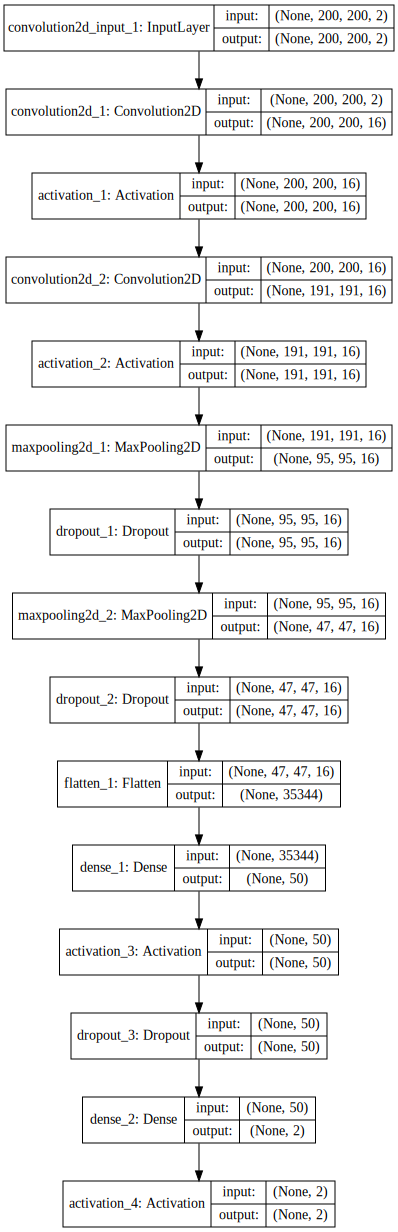

In [22]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

### Train model

In [10]:
classifier_history = model.fit(X_train, Y_train,
          batch_size=20,
          verbose=0,
          nb_epoch=50,
          validation_data=(X_test, Y_test),
          shuffle=True)

### Show results

After 50 epochs, the training loss for the classifier seem to steadily decrease, but validation loss increases. This is characteristic of overfitting. 

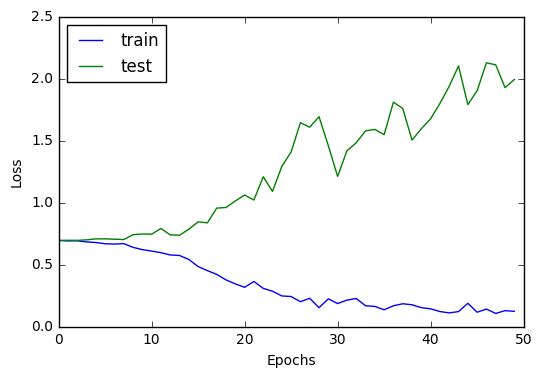

In [43]:
plt.plot(classifier_history.history['loss'], label='train')
plt.plot(classifier_history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

When looking at the accuracies of the test-set and train-set, the training accuracy increases but test accuracy does not rise above 0.5. This suggests that the model has not learning anything more useful that randomly choose which drugs were positive and which were negative.

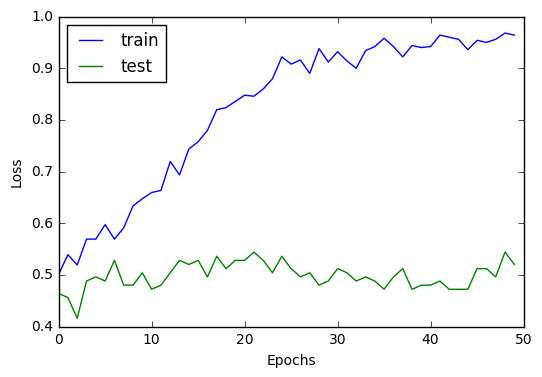

In [44]:
plt.plot(classifier_history.history['acc'], label='train')
plt.plot(classifier_history.history['val_acc'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

## AutoEncoder Analysis

Next, I implemented an [autoencoder](https://en.wikipedia.org/wiki/Autoencoder). An unsupervised method from deep learning that can learn high level representations of dataset in an unsupervised fashion. Autoencoders are comprising of two functions: and encoder and a decoder. The encoder transforms the 200x200 image into a 1-dimensional vector of length 200. The decoder transforms the 1-dimensional length 200 vector back into a 2-dimension images of size 200x200 pixels. These functions are trained to minimise the reconstruction error of the decoder.

### Load AutoEncoder

I autoencoded the images with respect to themselves. I used both channels and penalised the green channel 50x as much as the red channel.

In [24]:
inner_dim = 200
autoencoder, encoder, decoder = generate_autoencoder(inner_dim)

### Train autoencoder

In [ ]:
autoencoder_history = autoencoder.fit(X_train, X_train,
                nb_epoch=500,
                verbose=2,
                batch_size=500,
                shuffle=True,
                validation_data=(X_test, X_test))
autoencoder.save('models/autoencoder-dim-{}'.format(inner_dim))
encoder.save('models/encoder-dim-{}'.format(inner_dim))
decoder.save('models/decoder-dim-{}'.format(inner_dim))
pickle.dump(autoencoder_history.history, open('models/autoencoder-dim-{}-history'.format(inner_dim), 'wb'))

### Load pretrained autoencoder

In [25]:
inner_dim = 200
autoencoder = load_model('models/autoencoder-dim-{}'.format(inner_dim), custom_objects={"custom_loss":custom_loss})
encoder = load_model('models/encoder-dim-{}'.format(inner_dim), custom_objects={"custom_loss":custom_loss})
decoder = load_model('models/decoder-dim-{}'.format(inner_dim), custom_objects={"custom_loss":custom_loss})
autoencoder_history = pickle.load(open('models/autoencoder-dim-{}-history'.format(inner_dim), 'rb'))

### Visualize autoencoder structure

This diagram outline the internal layers of the autoencoder.

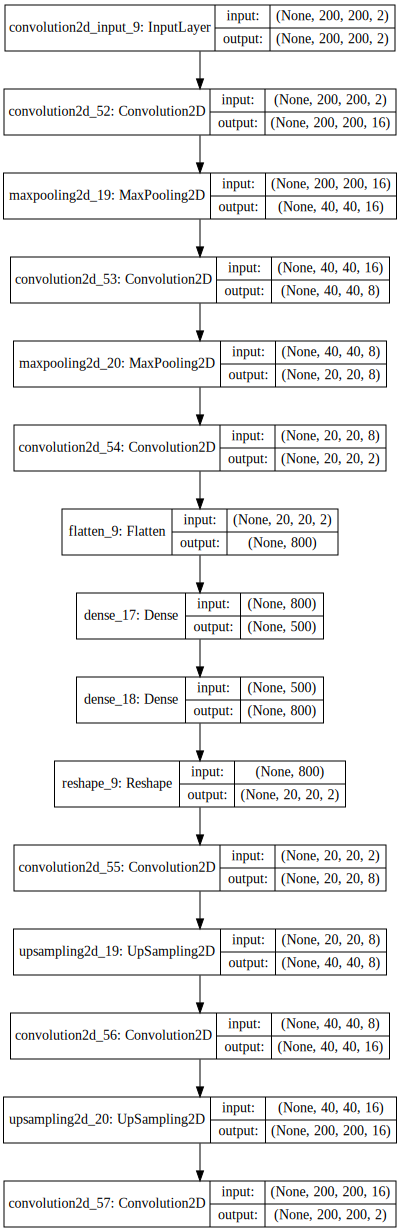

In [46]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

### View results

Both training and validation loss decrease.

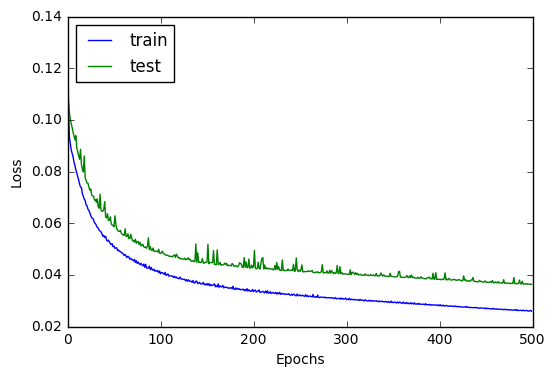

In [8]:
plt.plot(autoencoder_history['loss'], label='train')
plt.plot(autoencoder_history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

### View decodings

Here I display the raw images, and below the 'recovered' images from the decoded encodings. The images seem to be well recovered from the encodings on both channels.

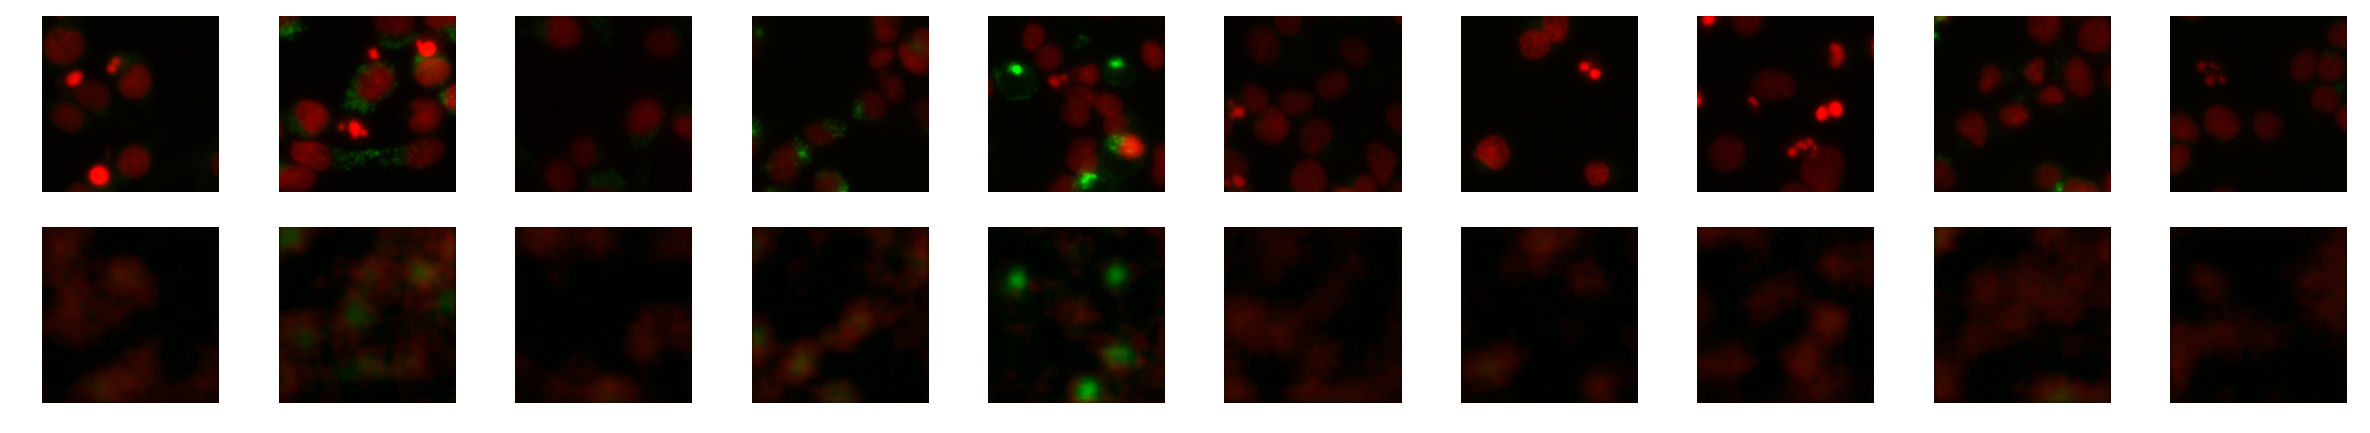

In [11]:
n = 10
idx = np.random.choice(range(len(X_test)), n)
decodings = autoencoder.predict(X_test)
random_images = X_test[idx]
random_decodings = decodings[idx]

f,a = plt.subplots(2,n,figsize=(30,5))
for i in range(n):
    a[0][i].imshow(add_blue(random_images[i]))
    a[0][i].axis('off')
    a[1][i].imshow(multiply_with_overflow(add_blue(random_decodings[i]), factor=[1,1,1]))
    a[1][i].axis('off')

### Investigate space of encoded output

Finally, I investigate this space of encoded output. That is, the encoded representations of the 200x200 pixel images into a vector of length 200. I utilise two methods to project these encoded representations down into a plane of two dimensions to investigate whether the positive and negative classes can be seperable. These two methods are [Principle Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) and [t-Distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (tSNE). PCA is a linear method which results in linear combinations of input features to provide orthogonal vectors which maximally explain the variance contained in the data. tSNE is a recent dimensionality technique which can be thought of as similar to PCA but allows non-linear relationships between features. They have been commonly used in the literature to project a high dimensional space onto a lower one, which results in interesting clusters in the data. Blue dots indicate postive examples and red dots indication negative examples.

### Principle Component Analysis

In [29]:
encodings = encoder.predict(X_train)

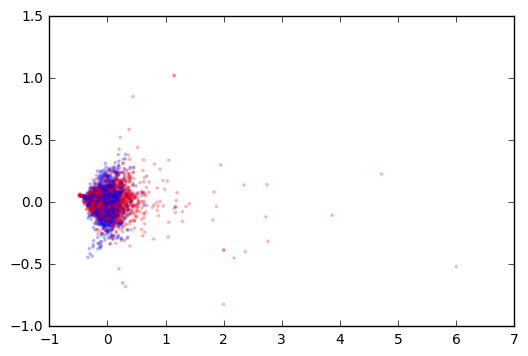

In [43]:
pca = PCA()
trans = pca.fit_transform(encodings)
painter = ['red','blue']
plt.scatter(trans[:,0], trans[:,1], color=[painter[y_train[i]] for i in range(len(y_train))], alpha=0.2, s=3)

### t-Distributed Stochastic Neighbor Embedding

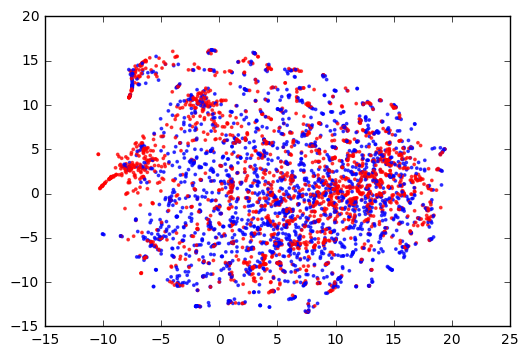

In [35]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
tsne_output = tsne.fit_transform(encodings)
painter = ['red','blue']
plt.scatter(tsne_output[:,0], tsne_output[:,1], color=[painter[y_train[i]] for i in range(len(y_train))], alpha=0.7, s=3)

# Conclusion

This writeup indicates that features derived from microscopy images can be autoencoded down to a compacted representation, but that features from this compressed representation of the network do not seem to yield information as to positive and negative drug examples in this case.